# Capston Project

Wenhao Chen

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = 'winequality-red.csv'
df = pd.read_csv(data)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preprocessing

In [3]:
#Check the baisc info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Check unique values of the dataset
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

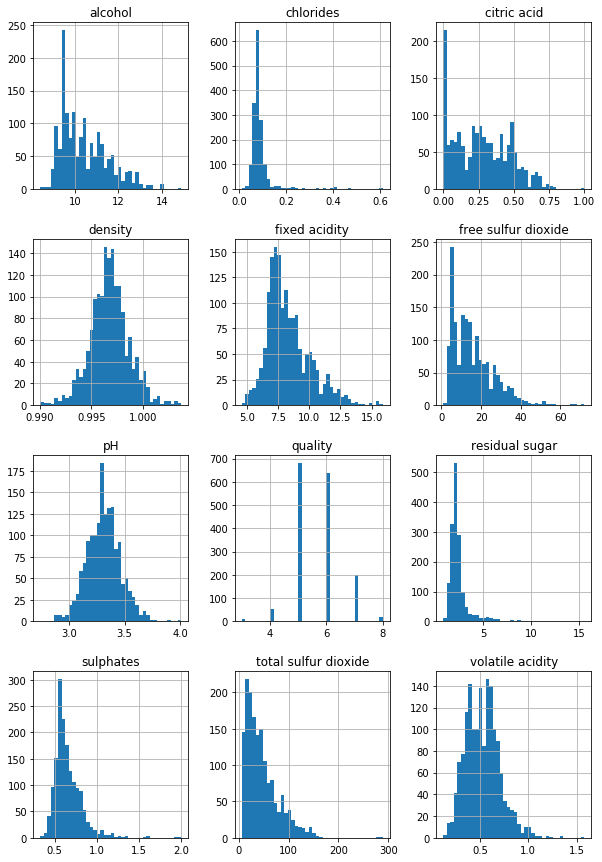

In [5]:
df.hist(bins=40, figsize=(10,15))
plt.show()

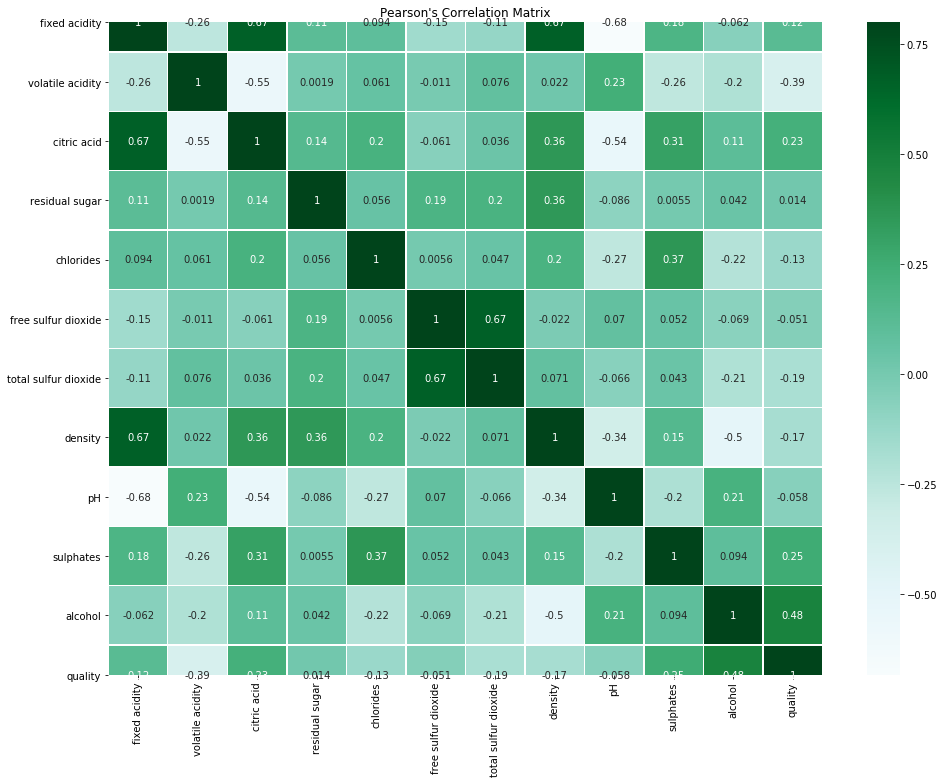

In [6]:
# show the correlation heatmap
f, ax = plt.subplots(figsize=(16, 12))
plt.title("Pearson's Correlation Matrix")

sns.heatmap(df.corr(), cmap="BuGn", linewidths=0.25, linecolor='w', vmax = 0.8, annot=True)

The heatmap plot shows that there are some variables which are correlated. Also, since this is a high-dimensional dataset, I decide to standardize the data and use PCA algorithm to reduce the dimension of the data.

The standardization and PCA method are written in pipeline when building models below.

## Data splitting

In [7]:
X, y = df.drop(['quality'], axis=1), df['quality']

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=2020, 
                     stratify=y)

## Model Building & Model Evaluation

In [8]:
# Evaluation Functions
def learningCurve(pipe):
    train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.05, 1.03])
    plt.tight_layout()
    plt.show()
    return

def confmat(pipe):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    return

We can regard the outcome variable as a numerical variable first and perform linear regression model.

In [9]:
pipe_lm = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        LinearRegression())

pipe_lm.fit(X_train, y_train)

print('Training Accuracy: %.3f' % pipe_lm.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lm.score(X_test, y_test))

Training Accuracy: 0.353
Test Accuracy: 0.314


The accuracy of the model is no good, so we can consider the outcome variable as categorical variable, and then, use the classification algorithms.

In [10]:
df.loc[(df['quality']==3),'quality']=1
df.loc[(df['quality']==4),'quality']=1

df.loc[(df['quality']==5),'quality']=2
df.loc[(df['quality']==6),'quality']=2

df.loc[(df['quality']==7),'quality']=3
df.loc[(df['quality']==8),'quality']=3

X, y = df.drop(['quality'], axis=1), df['quality']

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=2020, 
                     stratify=y)

In [11]:
# Logistic Regression model
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

0.8364623552123552
{'logisticregression__C': 1.0}
CV accuracy: 0.832 +/- 0.018


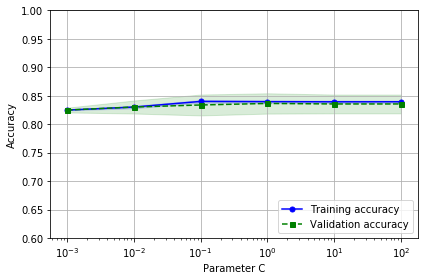

In [12]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        LogisticRegression(random_state=1, solver='lbfgs', C=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

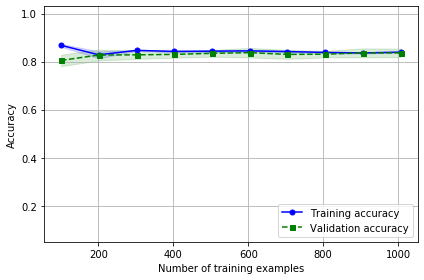

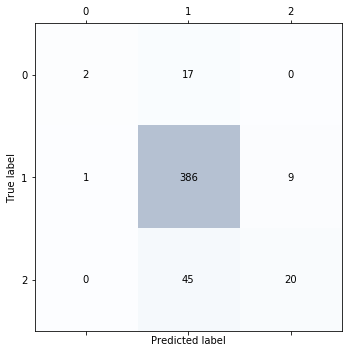

In [13]:
learningCurve(pipe_lr)
confmat(pipe_lr)

In [14]:
# Decision Tree model
pipe_dt = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        DecisionTreeClassifier(criterion='gini',
                                max_depth=8))

param_grid = [{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}]

gs = GridSearchCV(estimator=pipe_dt, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

0.8248471685971686
{'decisiontreeclassifier__max_depth': 1}
CV accuracy: 0.814 +/- 0.028


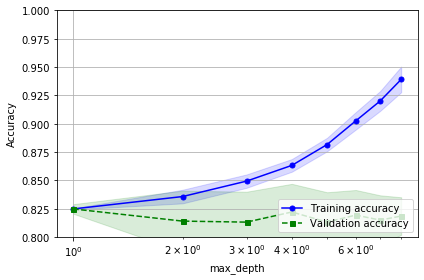

In [15]:
pipe_dt = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        DecisionTreeClassifier(criterion='gini',
                                max_depth=1))

param_range=[1, 2, 3, 4, 5, 6, 7, 8]
train_scores, test_scores = validation_curve(
                estimator=pipe_dt, 
                X=X_train, 
                y=y_train, 
                param_name='decisiontreeclassifier__max_depth', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

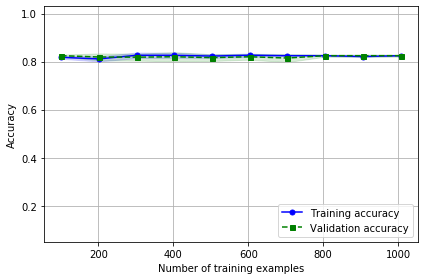

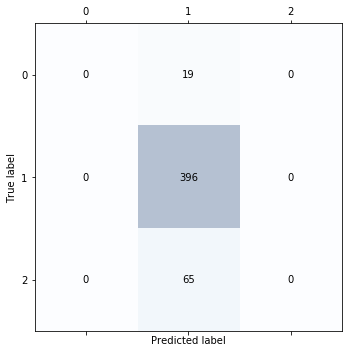

In [16]:
learningCurve(pipe_dt)
confmat(pipe_dt)

In [17]:
# SVM model
pipe_svc = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        SVC())

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'svc__C': param_range}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

0.8462837837837839
{'svc__C': 1.0}
CV accuracy: 0.846 +/- 0.017


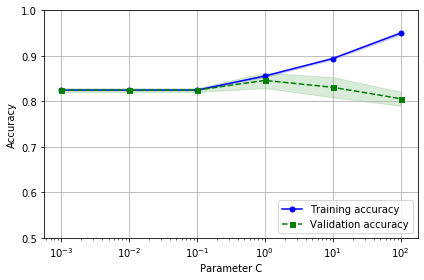

In [18]:
pipe_svc = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        SVC(C=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc, 
                X=X_train, 
                y=y_train, 
                param_name='svc__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

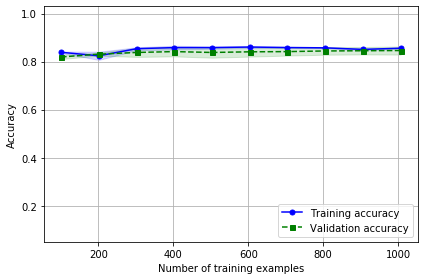

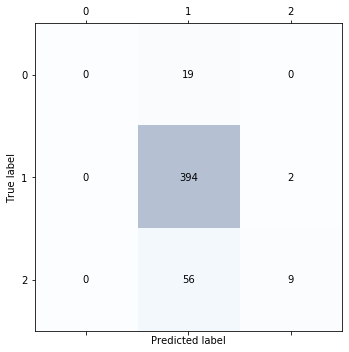

In [19]:
learningCurve(pipe_svc)
confmat(pipe_svc)

In [20]:
# K-nearest Neighbors model
pipe_knn = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        KNeighborsClassifier(n_neighbors=10))

param_grid = [{'kneighborsclassifier__n_neighbors': [i for i in range(30)]}]

gs = GridSearchCV(estimator=pipe_knn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

0.8373471685971687
{'kneighborsclassifier__n_neighbors': 14}
CV accuracy: 0.829 +/- 0.022


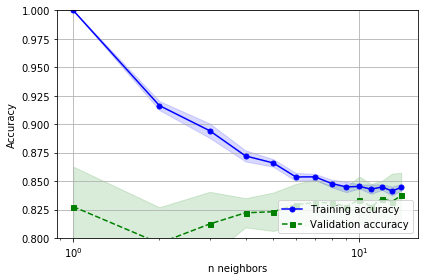

In [21]:
pipe_knn = make_pipeline(StandardScaler(),
                        PCA(n_components=0.9),
                        KNeighborsClassifier(n_neighbors=14))

param_range = [i for i in range(15)] #more
train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

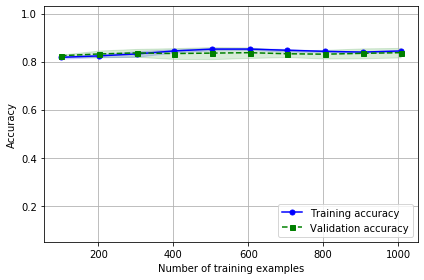

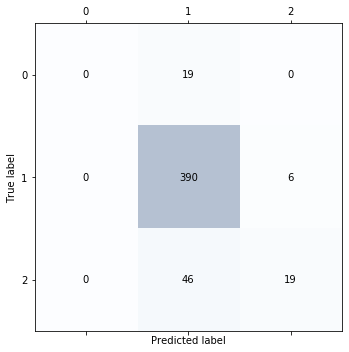

In [22]:
learningCurve(pipe_knn)
confmat(pipe_knn)

# Comparison:
From the evaluations of those models, we know that the SVM model is the best model for this prediction.